In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_data = pd.read_csv('crime-in-los-angeles/Crime_Data_2010_2017.csv')
crime_data = crime_data.drop(['DR Number', 'Area ID', 'Reporting District',
                              'Crime Code', 'MO Codes', 'Cross Street',
                              'Address', 'Crime Code 4', 'Crime Code 3',
                              'Crime Code 4', 'Weapon Used Code',
                              'Status Code', 'Premise Code', 'Crime Code 1',
                              'Crime Code 2'], axis = 1)
crime_data.head()

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Description,Location
0,03/14/2013,03/11/2013,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(33.9829, -118.3338)"
1,01/25/2010,01/22/2010,2300,Olympic,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,NaN,Invest Cont,"(34.0454, -118.3157)"
2,03/19/2013,03/18/2013,2030,Southeast,VEHICLE - STOLEN,12.0,NaN,NaN,STREET,NaN,Invest Cont,"(33.942, -118.2717)"
3,11/11/2010,11/10/2010,1800,Southeast,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,NaN,Invest Cont,"(33.9572, -118.2717)"
4,01/11/2014,01/04/2014,2300,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,SINGLE FAMILY DWELLING,NaN,Invest Cont,"(34.2009, -118.6369)"


In [3]:
crime_data.columns

Index(['Date Reported', 'Date Occurred', 'Time Occurred', 'Area Name',
       'Crime Code Description', 'Victim Age', 'Victim Sex', 'Victim Descent',
       'Premise Description', 'Weapon Description', 'Status Description',
       'Location '],
      dtype='object')

# Questions to (Hopefully) Answer:

- What are the most dangerous areas in LA ? (Done)

- Are females more likely to be a victim of sexual assault/rape in LA ?

- Is there a difference in the distribution of Victim Ages for males and females ? (Done)

- Is there a difference in the distribution of Victim Ages for different races ?

- What does the time of year (month) play in crime occurrence ?

- What is the most popular crime for each area ?

- What crimes occur during what parts of the day ?

- Are black people the biggest victims of gun violence in LA ?

- What race is the largest overall victim of crime in LA ?

In [4]:
#### FUNCTIONS FOR CLEANING/EXTRACTING INFO FROM THE DATE ####

def clean_time(time):
    time = str(time)
    len_time = len(time)
    
    if len_time == 1:
        time = '0{}:00'.format(time)
    elif len_time == 2:
        time += ':00'
    elif len_time == 3:
        time = time[0] + ':' + time[1:]
    elif len_time == 4:
        time = time[:2] + ':' + time[2:]
        
    time = convert_from_military(time)
    time += ' {}'.format(calculate_time_of_day(time))
    
    return time

def convert_from_military(time):
    split_time = time.split(':')
    hours, mins = split_time[0], split_time[1]
    
    cleaned_hour = ''
    
    if int(hours[0]) == 0:
        return time
    
    if int(hours) > 12:
        cleaned_hour = '{}'.format(int(hours) % 12)
    else:
        cleaned_hour = hours
    
    return '{}:{}'.format(cleaned_hour, mins)

def calculate_time_of_day(time):
    current_hour = int(time.split(':')[0])
    
    if current_hour < 12:
        return 'A.M.'
    else:
        return 'P.M.'
    
def time_of_day(time_am_pm):
    """
    Calculates the time of day from the following rules:
    
    Morning 5 am to 12 pm (noon)
    Afternoon 12 pm to 5 pm.
    Evening 5 pm to 9 pm.
    Night 9 pm to 4 am.
    
    """
    
    split_time_am_pm = time_am_pm.split(' ')
    time, am_pm = split_time_am_pm[0], split_time_am_pm[1]
    
    split_time = time.split(':')
    hour, minute = int(split_time[0]), int(split_time[1])
    
    if (am_pm == 'A.M.') and (5 <= hour < 12):
        return 'Morning'
    elif (am_pm == 'P.M.') and (12 <= hour < 5):
        return 'Afternoon'
    elif (am_pm == 'P.M.') and (5 <= hour < 9):
        return 'Evening'
    else:
        return 'Night'
    
def extract_month(date):
    split_date = date.split('/')
    month = split_date[0]
    
    months = {
        '01': 'January',
        '02': 'February',
        '03': 'March',
        '04': 'April',
        '05': 'May',
        '06': 'June',
        '07': 'July',
        '08': 'August',
        '09': 'September',
        '10': 'October',
        '11': 'November',
        '12': 'December'
    }
    
    return months.get(month)
##########

#### FUNCTION FOR CLEANING VICTIM SEX ####
def clean_victim_sex(victim_sex):
    if victim_sex == 'F':
        return 'Female'
    elif victim_sex == 'M':
        return 'Male'
    else:
        return 'N/A'
##########

In [5]:
crime_data['Year'] = crime_data['Date Occurred'].apply(lambda x: int(x[-4:]))
crime_data['Time Occurred'] = crime_data['Time Occurred'].apply(clean_time)
crime_data['Time of Day'] = crime_data['Time Occurred'].apply(time_of_day)
crime_data['Month Occurred'] = crime_data['Date Occurred'].apply(extract_month)
crime_data['Victim Sex'] = crime_data['Victim Sex'].apply(clean_victim_sex)

In [6]:
crime_data['Is Female'] = [1 if x == 'Female' else 0 for x in crime_data['Victim Sex']]
crime_data['Is Male'] = [1 if x == 'Male' else 0 for x in crime_data['Victim Sex']]

crime_data.head()

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Description,Location,Year,Time of Day,Month Occurred,Is Female,Is Male
0,03/14/2013,03/11/2013,6:00 A.M.,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,Female,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(33.9829, -118.3338)",2013,Morning,March,1,0
1,01/25/2010,01/22/2010,11:00 A.M.,Olympic,VEHICLE - STOLEN,NaN,N/A,NaN,STREET,NaN,Invest Cont,"(34.0454, -118.3157)",2010,Morning,January,0,0
2,03/19/2013,03/18/2013,8:30 A.M.,Southeast,VEHICLE - STOLEN,12.0,N/A,NaN,STREET,NaN,Invest Cont,"(33.942, -118.2717)",2013,Morning,March,0,0
3,11/11/2010,11/10/2010,6:00 A.M.,Southeast,VEHICLE - STOLEN,NaN,N/A,NaN,STREET,NaN,Invest Cont,"(33.9572, -118.2717)",2010,Morning,November,0,0
4,01/11/2014,01/04/2014,11:00 A.M.,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,Male,W,SINGLE FAMILY DWELLING,NaN,Invest Cont,"(34.2009, -118.6369)",2014,Morning,January,0,1


In [7]:
descent_codes = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian', 
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

def map_to_descent(descent_code):
    descent_mapping = descent_codes.get(descent_code)
    
    if descent_mapping == None:
        return 'N/A'
    
    return descent_mapping

crime_data['Victim Descent'] = crime_data['Victim Descent'].apply(map_to_descent)

is_victim_age_na = crime_data['Victim Age'].isna()
not_missing_victim_sex = crime_data['Victim Sex'] != 'N/A'
not_missing_victim_descent = crime_data['Victim Descent'] != 'N/A'

crime_data = crime_data[(is_victim_age_na == False) &
                        (not_missing_victim_sex) & 
                        (not_missing_victim_descent)]

crime_data.head()

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Description,Location,Year,Time of Day,Month Occurred,Is Female,Is Male
0,03/14/2013,03/11/2013,6:00 A.M.,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,Female,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(33.9829, -118.3338)",2013,Morning,March,1,0
4,01/11/2014,01/04/2014,11:00 A.M.,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,Male,White,SINGLE FAMILY DWELLING,NaN,Invest Cont,"(34.2009, -118.6369)",2014,Morning,January,0,1
5,01/08/2013,01/08/2013,2:00 A.M.,Central,CRIMINAL HOMICIDE,49.0,Female,White,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,"(34.0591, -118.2412)",2013,Night,January,1,0
9,03/29/2013,01/15/2013,8:00 A.M.,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,Female,Other,OTHER BUSINESS,NaN,Invest Cont,"(34.2012, -118.4662)",2013,Morning,January,1,0
12,02/22/2013,02/13/2013,12:00 P.M.,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),42.0,Male,Hispanic/Latin/Mexican,PARKING LOT,NaN,Invest Cont,"(33.9651, -118.2783)",2013,Night,February,0,1


In [8]:
crime_by_area = crime_data.groupby('Area Name')

areas = []
num_crimes_for_area = []

for area, crimes_in_area in crime_by_area:
    areas.append(area)
    num_crimes_for_area.append(len(crimes_in_area))
    
x = pd.DataFrame({
    'Area': areas,
    'Number of Crimes Since 2010': num_crimes_for_area
}).sort_values(by = 'Number of Crimes Since 2010', ascending = False)

Text(0.5, 1.0, 'Areas w/ the Most Crime in Los Angeles')

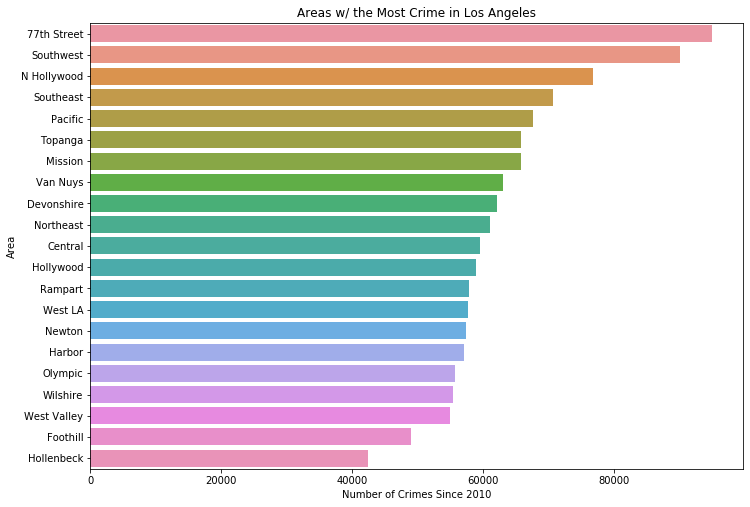

In [9]:
fig, ax = plt.subplots(figsize = (11.7, 8.2))
sns.barplot('Number of Crimes Since 2010', 'Area', data = x, ax = ax).set_title('Areas w/ the Most Crime in Los Angeles')

In [10]:
male_victims, female_victims = crime_data[crime_data['Victim Sex'] == 'Male'], crime_data[crime_data['Victim Sex'] == 'Female'] 
print('There are {} male victims and {} female victims'.format(len(male_victims), len(female_victims)))

There are 663077 male victims and 660434 female victims


Mean Victim Age for Females: 37.61453529043023
Mean Victim Age for Males: 38.79406765730074
Observed difference between means: -1.1795323668705038


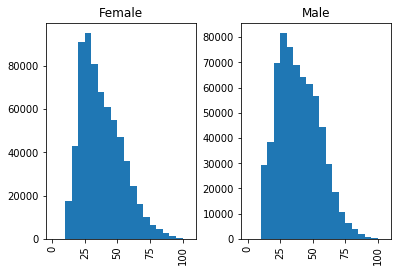

In [11]:
age_dist = crime_data.hist('Victim Age', by = 'Victim Sex', bins = np.arange(0, 110, 5))
mean_vict_age_female = np.mean(female_victims['Victim Age'])
mean_vict_age_male = np.mean(male_victims['Victim Age'])
observed_victim_age_diff = mean_vict_age_female - mean_vict_age_male

print('Mean Victim Age for Females: {}'.format(mean_vict_age_female))
print('Mean Victim Age for Males: {}'.format(mean_vict_age_male))
print('Observed difference between means: {}'.format(observed_victim_age_diff))

As we can see, the average victim age for females is lower than the average victim age for males in this sample.  Also, the distribution of victim ages for females is slightly different than the distribution of victim ages for males.  I will perform an A/B test to determine whether this difference is due to chance variation or to differences in the distributions in the larger population.

### Null Hypothesis

The distribution of victim ages for females is the same as the distribution of victim ages for males in the population.  Any differences in these two distributions is due to random chance.

### Alternative Hypothesis

The victim age for females is lower, on average, than the victim age for males in the population.

### Test Statistic

The test statistic I will use for this hypothesis test is the difference between the mean of the two groups, defined as: **"mean victim age of female group" - "mean victim age of male group"**.  I chose this test statistic because large negative values of it will favor the alternative hypothesis.

I will now generate 500 values of the test statistic under the assumptions of the null hypothesis through a permutation test.

In [184]:
def one_test_stat_victim_age():
    shuffled_labels = crime_data['Victim Sex'].sample(frac = 1, replace=False).values
    
    new_t = pd.DataFrame({
        'Shuffled': shuffled_labels,
        'Old Labels': crime_data['Victim Sex'].values,
        'Victim Age': crime_data['Victim Age'].values
    })
    
    grouped_by_gender = new_t.groupby('Shuffled').groups
    
    male_group = grouped_by_gender.get('Male').values
    female_group = grouped_by_gender.get('Female').values
    
    male_avg_age = np.mean(crime_data.loc[male_group]['Victim Age'])
    female_avg_age = np.mean(crime_data.loc[female_group]['Victim Age'])
    
    test_statistic = female_avg_age - male_avg_age
        
    return test_statistic    
    
test_statistics = []

for i in range(500):
    one_simulated_statistic = one_test_stat_victim_age()
    test_statistics.append(one_simulated_statistic)
    print('{}/500'.format(i + 1))
    
len(test_statistics)

/Users/louisspencer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app
/Users/louisspencer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
50/500
51/500
52/500
53/500
54/500
55/500
56/500
57/500
58/500
59/500
60/500
61/500
62/500
63/500
64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131/500
132/500
133/500
134/500
135/500
136/500
137/500
138/500
139/

500

Text(0.5, 1.0, 'Empirical Distribution of the Test Statistic')

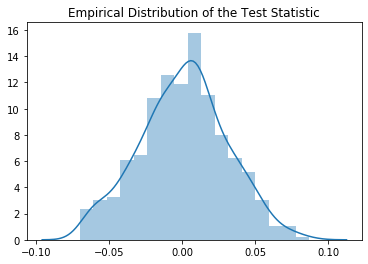

In [189]:
sns.distplot(test_statistics).set_title('Empirical Distribution of the Test Statistic')

In [187]:
empirical_p_value = np.count_nonzero(np.array(test_statistics) <= observed_victim_age_diff) / len(test_statistics)
empirical_p_value

0.0

### Conclusion

My emperical p-value that I generated by simulating the test statistic under the null hypothesis is 0, which is lower than the standard significance level of 0.05.  There is evidence against the null hypothesis.  Thus, the difference in the distributions of victim ages for males and females is statistically significant, and I reject the null hypothesis.  The victim age for females is lower, on average, than the victim age for males in the population.

# Estimating the Population Proportion of Sexual Assault/Rape Victims by Sex

In [16]:
sa_rape_code1 = 'BATTERY WITH SEXUAL CONTACT'
sa_rape_code2 = 'RAPE, ATTEMPTED'
sa_rape_code3 = 'RAPE, FORCIBLE'
sa_rape_code4 = 'SEXUAL PENTRATION WITH A FOREIGN OBJECT'
sa_rape_code5 = 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02'

crime_code = crime_data['Crime Code Description']

sa_rape_victims = crime_data[(crime_code == sa_rape_code1) |
                             (crime_code == sa_rape_code2) |
                             (crime_code == sa_rape_code3) |
                             (crime_code == sa_rape_code4) |
                             (crime_code == sa_rape_code5)]

print('{} sexual assault/rape victims'.format(len(sa_rape_victims)))
sa_rape_victims.head()

18081 sexual assault/rape victims


,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Description,Location,Year,Time of Day,Month Occurred,Is Female,Is Male
30,01/13/2013,01/10/2013,3:00 A.M.,Central,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,18.0,Male,White,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,"(34.0423, -118.2452)",2013,Night,January,0,1
64,02/15/2013,02/14/2013,9:00 A.M.,Central,BATTERY WITH SEXUAL CONTACT,33.0,Female,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,"(34.0482, -118.2472)",2013,Morning,February,1,0
215,06/03/2013,06/01/2013,2:00 A.M.,Central,"RAPE, FORCIBLE",15.0,Female,White,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,"(34.0453, -118.2499)",2013,Night,June,1,0
376,09/19/2013,09/18/2013,11:00 A.M.,Central,"RAPE, FORCIBLE",28.0,Female,Black,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(34.0578, -118.252)",2013,Morning,September,1,0
410,10/14/2013,10/13/2013,1:40 A.M.,Central,SEXUAL PENTRATION WITH A FOREIGN OBJECT,57.0,Female,White,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(34.0403, -118.2421)",2013,Night,October,1,0


In [17]:
sa_rape_male_victim_prop = np.count_nonzero(sa_rape_victims['Victim Sex'] == 'Male') / len(sa_rape_victims)
sa_rape_female_victim_prop = np.count_nonzero(sa_rape_victims['Victim Sex'] == 'Female') / len(sa_rape_victims)

print('Proportion of sexual assault/rape victims that are female: {}'.format(sa_rape_female_victim_prop))
print('Proportion of sexual assault/rape victims that are male: {}'.format(sa_rape_male_victim_prop))

Proportion of sexual assault/rape victims that are female: 0.9342956694873071
Proportion of sexual assault/rape victims that are male: 0.06570433051269288


In [18]:
def calculate_bootstrap_proportion(sex):
    sa_rape_victims_resample = sa_rape_victims.sample(frac = 1, replace = True)
    sa_rape_prop_for_sex = np.count_nonzero(sa_rape_victims_resample['Victim Sex'] == sex) / len(sa_rape_victims)
    return sa_rape_prop_for_sex

I will now compute a 95 percent confidence interval using bootstrapping to estimate the population proportion of rape victims that are male and female. I will compute 5000 bootsrapped sexual assault/rape proportions for both males and females and use those values to create my confidence interval.

In [19]:
prop_rape_sa_victims_female = []
prop_rape_sa_victims_male = []

for i in range(5000):
    bootstrapped_prop_female = calculate_bootstrap_proportion('Female')
    bootstrapped_prop_male = calculate_bootstrap_proportion('Male')
    
    prop_rape_sa_victims_female.append(bootstrapped_prop_female)
    prop_rape_sa_victims_male.append(bootstrapped_prop_male)
    
    print('{}/5000'.format(i + 1))

1/5000
2/5000
3/5000
4/5000
5/5000
6/5000
7/5000
8/5000
9/5000
10/5000
11/5000
12/5000
13/5000
14/5000
15/5000
16/5000
17/5000
18/5000
19/5000
20/5000
21/5000
22/5000
23/5000
24/5000
25/5000
26/5000
27/5000
28/5000
29/5000
30/5000
31/5000
32/5000
33/5000
34/5000
35/5000
36/5000
37/5000
38/5000
39/5000
40/5000
41/5000
42/5000
43/5000
44/5000
45/5000
46/5000
47/5000
48/5000
49/5000
50/5000
51/5000
52/5000
53/5000
54/5000
55/5000
56/5000
57/5000
58/5000
59/5000
60/5000
61/5000
62/5000
63/5000
64/5000
65/5000
66/5000
67/5000
68/5000
69/5000
70/5000
71/5000
72/5000
73/5000
74/5000
75/5000
76/5000
77/5000
78/5000
79/5000
80/5000
81/5000
82/5000
83/5000
84/5000
85/5000
86/5000
87/5000
88/5000
89/5000
90/5000
91/5000
92/5000
93/5000
94/5000
95/5000
96/5000
97/5000
98/5000
99/5000
100/5000
101/5000
102/5000
103/5000
104/5000
105/5000
106/5000
107/5000
108/5000
109/5000
110/5000
111/5000
112/5000
113/5000
114/5000
115/5000
116/5000
117/5000
118/5000
119/5000
120/5000
121/5000
122/5000
123/5000
1

935/5000
936/5000
937/5000
938/5000
939/5000
940/5000
941/5000
942/5000
943/5000
944/5000
945/5000
946/5000
947/5000
948/5000
949/5000
950/5000
951/5000
952/5000
953/5000
954/5000
955/5000
956/5000
957/5000
958/5000
959/5000
960/5000
961/5000
962/5000
963/5000
964/5000
965/5000
966/5000
967/5000
968/5000
969/5000
970/5000
971/5000
972/5000
973/5000
974/5000
975/5000
976/5000
977/5000
978/5000
979/5000
980/5000
981/5000
982/5000
983/5000
984/5000
985/5000
986/5000
987/5000
988/5000
989/5000
990/5000
991/5000
992/5000
993/5000
994/5000
995/5000
996/5000
997/5000
998/5000
999/5000
1000/5000
1001/5000
1002/5000
1003/5000
1004/5000
1005/5000
1006/5000
1007/5000
1008/5000
1009/5000
1010/5000
1011/5000
1012/5000
1013/5000
1014/5000
1015/5000
1016/5000
1017/5000
1018/5000
1019/5000
1020/5000
1021/5000
1022/5000
1023/5000
1024/5000
1025/5000
1026/5000
1027/5000
1028/5000
1029/5000
1030/5000
1031/5000
1032/5000
1033/5000
1034/5000
1035/5000
1036/5000
1037/5000
1038/5000
1039/5000
1040/5000
1041/

1765/5000
1766/5000
1767/5000
1768/5000
1769/5000
1770/5000
1771/5000
1772/5000
1773/5000
1774/5000
1775/5000
1776/5000
1777/5000
1778/5000
1779/5000
1780/5000
1781/5000
1782/5000
1783/5000
1784/5000
1785/5000
1786/5000
1787/5000
1788/5000
1789/5000
1790/5000
1791/5000
1792/5000
1793/5000
1794/5000
1795/5000
1796/5000
1797/5000
1798/5000
1799/5000
1800/5000
1801/5000
1802/5000
1803/5000
1804/5000
1805/5000
1806/5000
1807/5000
1808/5000
1809/5000
1810/5000
1811/5000
1812/5000
1813/5000
1814/5000
1815/5000
1816/5000
1817/5000
1818/5000
1819/5000
1820/5000
1821/5000
1822/5000
1823/5000
1824/5000
1825/5000
1826/5000
1827/5000
1828/5000
1829/5000
1830/5000
1831/5000
1832/5000
1833/5000
1834/5000
1835/5000
1836/5000
1837/5000
1838/5000
1839/5000
1840/5000
1841/5000
1842/5000
1843/5000
1844/5000
1845/5000
1846/5000
1847/5000
1848/5000
1849/5000
1850/5000
1851/5000
1852/5000
1853/5000
1854/5000
1855/5000
1856/5000
1857/5000
1858/5000
1859/5000
1860/5000
1861/5000
1862/5000
1863/5000
1864/5000


2589/5000
2590/5000
2591/5000
2592/5000
2593/5000
2594/5000
2595/5000
2596/5000
2597/5000
2598/5000
2599/5000
2600/5000
2601/5000
2602/5000
2603/5000
2604/5000
2605/5000
2606/5000
2607/5000
2608/5000
2609/5000
2610/5000
2611/5000
2612/5000
2613/5000
2614/5000
2615/5000
2616/5000
2617/5000
2618/5000
2619/5000
2620/5000
2621/5000
2622/5000
2623/5000
2624/5000
2625/5000
2626/5000
2627/5000
2628/5000
2629/5000
2630/5000
2631/5000
2632/5000
2633/5000
2634/5000
2635/5000
2636/5000
2637/5000
2638/5000
2639/5000
2640/5000
2641/5000
2642/5000
2643/5000
2644/5000
2645/5000
2646/5000
2647/5000
2648/5000
2649/5000
2650/5000
2651/5000
2652/5000
2653/5000
2654/5000
2655/5000
2656/5000
2657/5000
2658/5000
2659/5000
2660/5000
2661/5000
2662/5000
2663/5000
2664/5000
2665/5000
2666/5000
2667/5000
2668/5000
2669/5000
2670/5000
2671/5000
2672/5000
2673/5000
2674/5000
2675/5000
2676/5000
2677/5000
2678/5000
2679/5000
2680/5000
2681/5000
2682/5000
2683/5000
2684/5000
2685/5000
2686/5000
2687/5000
2688/5000


3412/5000
3413/5000
3414/5000
3415/5000
3416/5000
3417/5000
3418/5000
3419/5000
3420/5000
3421/5000
3422/5000
3423/5000
3424/5000
3425/5000
3426/5000
3427/5000
3428/5000
3429/5000
3430/5000
3431/5000
3432/5000
3433/5000
3434/5000
3435/5000
3436/5000
3437/5000
3438/5000
3439/5000
3440/5000
3441/5000
3442/5000
3443/5000
3444/5000
3445/5000
3446/5000
3447/5000
3448/5000
3449/5000
3450/5000
3451/5000
3452/5000
3453/5000
3454/5000
3455/5000
3456/5000
3457/5000
3458/5000
3459/5000
3460/5000
3461/5000
3462/5000
3463/5000
3464/5000
3465/5000
3466/5000
3467/5000
3468/5000
3469/5000
3470/5000
3471/5000
3472/5000
3473/5000
3474/5000
3475/5000
3476/5000
3477/5000
3478/5000
3479/5000
3480/5000
3481/5000
3482/5000
3483/5000
3484/5000
3485/5000
3486/5000
3487/5000
3488/5000
3489/5000
3490/5000
3491/5000
3492/5000
3493/5000
3494/5000
3495/5000
3496/5000
3497/5000
3498/5000
3499/5000
3500/5000
3501/5000
3502/5000
3503/5000
3504/5000
3505/5000
3506/5000
3507/5000
3508/5000
3509/5000
3510/5000
3511/5000


4242/5000
4243/5000
4244/5000
4245/5000
4246/5000
4247/5000
4248/5000
4249/5000
4250/5000
4251/5000
4252/5000
4253/5000
4254/5000
4255/5000
4256/5000
4257/5000
4258/5000
4259/5000
4260/5000
4261/5000
4262/5000
4263/5000
4264/5000
4265/5000
4266/5000
4267/5000
4268/5000
4269/5000
4270/5000
4271/5000
4272/5000
4273/5000
4274/5000
4275/5000
4276/5000
4277/5000
4278/5000
4279/5000
4280/5000
4281/5000
4282/5000
4283/5000
4284/5000
4285/5000
4286/5000
4287/5000
4288/5000
4289/5000
4290/5000
4291/5000
4292/5000
4293/5000
4294/5000
4295/5000
4296/5000
4297/5000
4298/5000
4299/5000
4300/5000
4301/5000
4302/5000
4303/5000
4304/5000
4305/5000
4306/5000
4307/5000
4308/5000
4309/5000
4310/5000
4311/5000
4312/5000
4313/5000
4314/5000
4315/5000
4316/5000
4317/5000
4318/5000
4319/5000
4320/5000
4321/5000
4322/5000
4323/5000
4324/5000
4325/5000
4326/5000
4327/5000
4328/5000
4329/5000
4330/5000
4331/5000
4332/5000
4333/5000
4334/5000
4335/5000
4336/5000
4337/5000
4338/5000
4339/5000
4340/5000
4341/5000


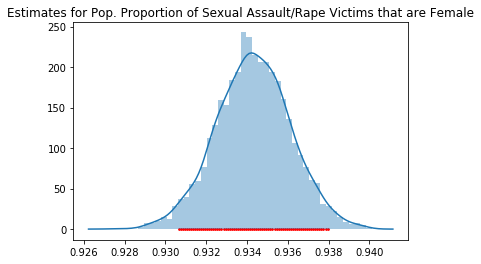

In [21]:
sns.distplot(prop_rape_sa_victims_female).set_title('Estimates for Pop. Proportion of Sexual Assault/Rape Victims that are Female')

left_female_sa_rape_prop = np.percentile(prop_rape_sa_victims_female, 2.5)
right_female_sa_rape_prop = np.percentile(prop_rape_sa_victims_female, 97.5)

x_vals_f = np.arange(left_female_sa_rape_prop, right_female_sa_rape_prop + 0.0001, 0.0001)
x_len_f = len(x_vals_f)
y_vals_f = [0 for _ in range(x_len_f)]

plt.scatter(x_vals_f, y_vals_f, c = 'red', s = 3)

In [22]:
print('I am 95% confident that the population proportion of sexual assault/rape victims that are female is in the interval:\n [{}, {}]'.format(left_female_sa_rape_prop, right_female_sa_rape_prop))

I am 95% confident that the population proportion of sexual assault/rape victims that are female is in the interval:
 [0.9306454289032686, 0.9378906033958299]


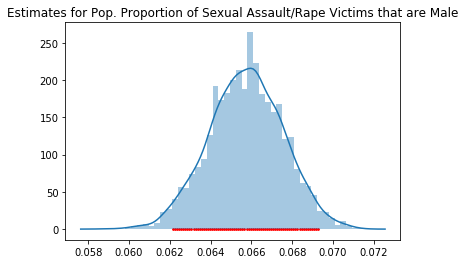

In [23]:
sns.distplot(prop_rape_sa_victims_male).set_title('Estimates for Pop. Proportion of Sexual Assault/Rape Victims that are Male')

left_male_sa_rape_prop = np.percentile(prop_rape_sa_victims_male, 2.5)
right_male_sa_rape_prop = np.percentile(prop_rape_sa_victims_male, 97.5)

x_vals_m = np.arange(left_male_sa_rape_prop, right_male_sa_rape_prop + 0.0001, 0.0001)
x_len_m = len(x_vals_m)
y_vals_m = [0 for _ in range(x_len_m)]

plt.scatter(x_vals_m, y_vals_m, c = 'red', s = 3)

In [24]:
print('I am 95% confident that the population proportion of sexual assault/rape victims that are male is in the interval:\n [{}, {}]'.format(left_male_sa_rape_prop, right_male_sa_rape_prop))

I am 95% confident that the population proportion of sexual assault/rape victims that are male is in the interval:
 [0.06216470327968586, 0.06918865107018417]


Now I will explore the proportion of crime targeting males and females respectively that is sexual assault/rape.

In [27]:
sa_rape_crime_prop_female = np.count_nonzero(sa_rape_victims['Victim Sex'] == 'Female') / len(female_victims)
sa_rape_crime_prop_male = np.count_nonzero(sa_rape_victims['Victim Sex'] == 'Male') / len(male_victims)
observed_sa_rape_prop_diff = sa_rape_crime_prop_male - sa_rape_crime_prop_female

In [37]:
print('The proportion of crimes in Los Angeles targeting females that are sexual assaults/rapes: {}'.format(sa_rape_crime_prop_female))
print('The proportion of crimes in Los Angeles targeting males that are sexual assaults/rapes: {}'.format(sa_rape_crime_prop_male))
print()
print('Observed difference between the two proportions: {}'.format(observed_sa_rape_prop_diff))
print()
print('Women are affected by sexual assault/rape crimes in Los Angeles around {} times as much as men'.format(round(sa_rape_crime_prop_female / sa_rape_crime_prop_male)))

The proportion of crimes in Los Angeles targeting females that are sexual assaults/rapes: 0.02557863465539327
The proportion of crimes in Los Angeles targeting males that are sexual assaults/rapes: 0.0017916471239388487

Observed difference between the two proportions: -0.02378698753145442

Women are affected by sexual assault/rape crimes in Los Angeles around 14 times as much as men


The proportion of crimes targeting females that are sexual assaults/rapes is over an order of magnitude larger than the respective proportion for males.  Is this difference significant ? Are females more likely to be a victim of sexual assault/rape ? I will conduct another A/B test to determine whether or not this observed difference is due to chance variation in the sample.

## Null Hypothesis

In the population, the distribution of sexual assault/rape occurrences for females in Los Angeles is the same as the distribution of sexual assault/rape occurrences for males in Los Angeles.  Any differences between the two groups is due to random chance.

## Alternate Hypothesis

Females in Los Angeles get sexually assaulted/raped more often than males in Los Angeles on average.

## Test Statistic

The test statistic I will use is the difference between the proportion of male sexual assault victims and the proportion of female sexual assault victims.  Large negative values will thus favor the alternative hypothesis.

I will generate 500 values of the test statistic under the assumptions of the null hypothesis through a permutation test.

In [178]:
def generate_test_stat_prop():    
    shuffled_labels = crime_data['Victim Sex'].sample(frac = 1, replace=False).values
    
    new_t = pd.DataFrame({
        'Shuffled': shuffled_labels,
        'Old Labels': crime_data['Victim Sex'].values,
        'Is Victim': crime_data['Victim of Sexual Assault/Rape'].values
    })
    
    grouped_by_gender = new_t.groupby('Shuffled').groups
    
    male_group = grouped_by_gender.get('Male').values
    female_group = grouped_by_gender.get('Female').values
    
    male_prop = np.mean(crime_data.loc[male_group]['Victim of Sexual Assault/Rape'])
    female_prop = np.mean(crime_data.loc[female_group]['Victim of Sexual Assault/Rape'])
    
    test_statistic = male_prop - female_prop
        
    return test_statistic

In [72]:
crime_data['Victim of Sexual Assault/Rape'] = [1 if x == sa_rape_code1 or
                                               x == sa_rape_code2 or
                                               x == sa_rape_code3 or
                                               x == sa_rape_code4 or
                                               x == sa_rape_code5 else 0 for x in crime_code]

In [182]:
test_statistics_props = np.array([])

for i in range(500):
    one_simulated_statistic = generate_test_stat_prop()
    test_statistics_props = np.append(test_statistics_props, one_simulated_statistic)
    print('{}/500'.format(i + 1))

/Users/louisspencer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app
/Users/louisspencer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
50/500
51/500
52/500
53/500
54/500
55/500
56/500
57/500
58/500
59/500
60/500
61/500
62/500
63/500
64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131/500
132/500
133/500
134/500
135/500
136/500
137/500
138/500
139/

Text(0.5, 1.0, 'Empirical Distribution of the Test Statistic')

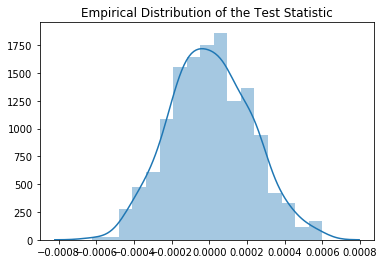

In [191]:
sns.distplot(test_statistics_props).set_title('Empirical Distribution of the Test Statistic')

In [190]:
empirical_p_value = np.count_nonzero(test_statistics_props <= observed_sa_rape_prop_diff) / len(test_statistics_props)
empirical_p_value

0.0

In [8]:
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Description,Location,Year,Time of Day,Month Occurred,Is Female,Is Male
0,03/14/2013,03/11/2013,6:00 A.M.,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,Female,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(33.9829, -118.3338)",2013,Morning,March,1,0
4,01/11/2014,01/04/2014,11:00 A.M.,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,Male,White,SINGLE FAMILY DWELLING,NaN,Invest Cont,"(34.2009, -118.6369)",2014,Morning,January,0,1
5,01/08/2013,01/08/2013,2:00 A.M.,Central,CRIMINAL HOMICIDE,49.0,Female,White,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,"(34.0591, -118.2412)",2013,Night,January,1,0
9,03/29/2013,01/15/2013,8:00 A.M.,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,Female,Other,OTHER BUSINESS,NaN,Invest Cont,"(34.2012, -118.4662)",2013,Morning,January,1,0
12,02/22/2013,02/13/2013,12:00 P.M.,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),42.0,Male,Hispanic/Latin/Mexican,PARKING LOT,NaN,Invest Cont,"(33.9651, -118.2783)",2013,Night,February,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,09/07/2017,09/07/2017,10:05 A.M.,Topanga,THEFT PLAIN - PETTY ($950 & UNDER),51.0,Female,White,SINGLE FAMILY DWELLING,NaN,Invest Cont,"(34.1883, -118.6536)",2017,Morning,September,1,0
1584312,09/07/2017,09/07/2017,12:00 P.M.,Topanga,BURGLARY FROM VEHICLE,40.0,Male,White,PARKING LOT,NaN,Invest Cont,"(34.1905, -118.6059)",2017,Night,September,0,1
1584313,08/30/2017,07/15/2017,01:00 A.M.,Topanga,DOCUMENT FORGERY / STOLEN FELONY,52.0,Male,White,OTHER BUSINESS,NaN,Invest Cont,"(34.201, -118.5885)",2017,Night,July,0,1
1584314,09/08/2017,09/08/2017,6:45 A.M.,Topanga,OTHER MISCELLANEOUS CRIME,47.0,Male,Hispanic/Latin/Mexican,STREET,NaN,Invest Cont,"(34.2029, -118.6003)",2017,Morning,September,0,1


### Conclusion

My emperical p-value that I generated by simulating the test statistic under the null hypothesis is 0, which is lower than the standard significance level of 0.05.  There is evidence against the null hypothesis.  Thus, the difference in the distributions of sexual assault/rape occurrencees for males and females is statistically significant, and I reject the null hypothesis.  Females get sexually assaulted/raped more often than males in Los Angeles on average.